In [2]:
#%matplotlib ipympl  # enable this for realtime graphs

# first compile the c modules where the model depends on
from explain_core.ModulesCompiler import compile_modules;

# compile the c++ modules if necessary
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# disable spontaneous breathing
neo.model.models["Breathing"].breathing_enabled = False

# configure the ventilator
neo.model.models["Ventilator"].vent_mode = "PRVC"
neo.model.models["Ventilator"].pip_cmh2o_max = 20.0
neo.model.models["Ventilator"].peep_cmh2o = 3.0
neo.model.models["Ventilator"].tidal_volume = 0.015
neo.model.models["Ventilator"].vent_rate = 40.0
neo.model.models["Ventilator"].insp_flow = 8.0

# turn on the ventilator
neo.model.models["Ventilator"].switch_ventilator(True)

# stabilize by calculating 120 seconds
neo.fastforward(120)

Ready in 5.1 sec. Average model step in 0.0214 ms.


In [5]:
neo.get_vitals()


AA.pres         : max   65.87645, min   41.91526 mmHg
PA.pres         : max   38.56112, min    20.0663 mmHg
IVCI.pres       : max    3.98547, min    3.55015 mmHg


{'heartrate': 116.36607599707186,
 'spo2_pre': 97.92427201157997,
 'abp_systole': 65.87645,
 'abp_diastole': 41.91526,
 'pap_systole': 38.56112,
 'pap_diastole': 20.0663,
 'cvp': 3.695242156,
 'resp_rate': 0.0,
 'pH': 7.450451678375966,
 'po2': 95.82220278464992,
 'pco2': 37.494121236124776,
 'hco3': 25.77084351524418,
 'be': 1.621907973819221}

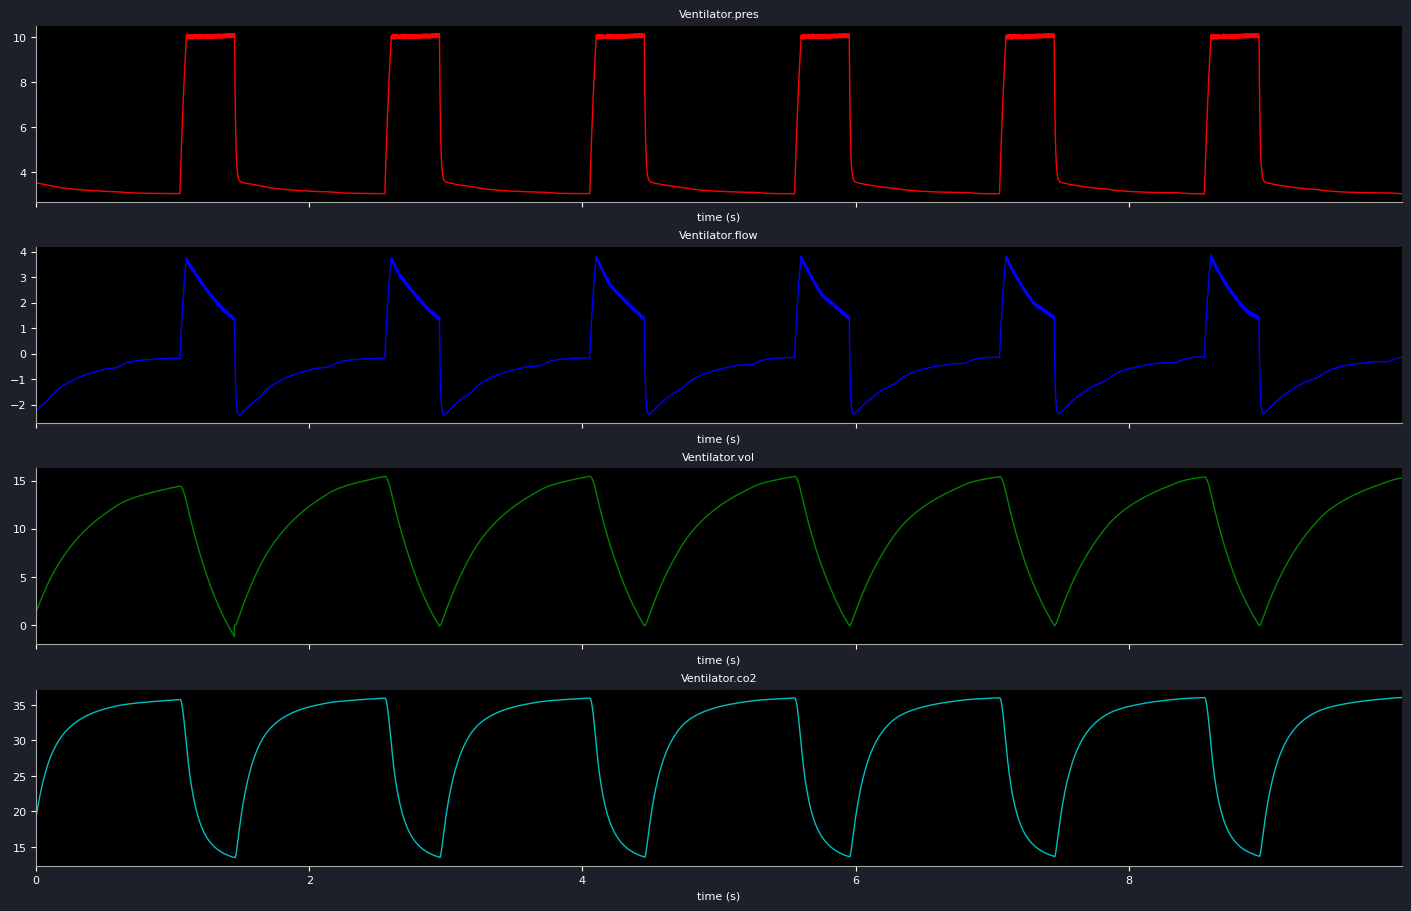

In [7]:
neo.plot_ventilator_curves(time_to_calculate=10)